# Hotel Rooms' Prices: Pricing Forecasting Analysis for Fall 2017

By Jeff Ohana

7/31/2021




## Introduction


The goal of this jupyter notebook is to first have a better understanding of the pricing data for a resort hotel and a city hotel referred throughout this notebook as H1 and H2, respectively. Indeed, for this assignment, I am provided with a csv file containing among others pricing data for H1 and H2 from July 2015 to August 2017. I will use some data visualization techniques to show how are the room prices per night behaving from Summer 2015 to Summer 2017.

Then, I aim at predicting the room prices per night from September 2017 till December 2017. The forecasting would help in having an idea of the hotel rooms' price ranges for the last months of 2017 ahead of time. This prediction analysis based on historical data could definitely be of use when it comes to decide for the prices of end 2017 for instance.

This notebook can be outlined as follow:

1 - Hotel Prices Visualization: July 2015-August 2017 

2 - Hotel Prices Prediction for Fall 2017


## 1 - Hotel Prices Visualization: July 2015-August 2017 

I am going to first load the packages that will be used for the empirical analysis of the hotel rooms' prices.


In [44]:
# load Pyplot plotting package and name it 'plt'
import matplotlib.pyplot as plt

# load Seaborn plotting package and name it 'sn'
import seaborn as sns

# load Pandas and name it 'pd' 
import pandas as pd


Now I can go ahead and read the hotel_bookings.csv file. The print statement outputs the first 5 rows of the loaded file which is shown to contain 32 columns. Most importantly, the 'adr' column stands for the price per night paid for the booking.

In [9]:
# read data from the 'hotel_bookings.csv' file
hotel_bookings_df = pd.read_csv('hotel_bookings.csv')
print(hotel_bookings_df.head())


          hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No Deposit   
1     

I am splitting and reframing the original dataframe into two dataframes for H1 and H2. 

In [18]:
# create two dataframes for the resort and city hotels
# H1 = Resort Hotel or H2 = City Hotel
hotel_group = hotel_bookings_df.groupby(['hotel'])
hotel_bookings_dfs = [hotel_group.get_group(h) for h in hotel_group.groups] 
H1_bookings_df = hotel_bookings_dfs[1]
H2_bookings_df = hotel_bookings_dfs[0].reset_index(drop = True)

# subsets of H1 and H2 dataframes
H1_bookings_df_subset = H1_bookings_df.loc[H1_bookings_df['adr']!=0, ['arrival_date_year', 'arrival_date_month', 'stays_in_weekend_nights', 'stays_in_week_nights','adr']]
H2_bookings_df_subset = H2_bookings_df.loc[H2_bookings_df['adr']!=0, ['arrival_date_year', 'arrival_date_month', 'stays_in_weekend_nights', 'stays_in_week_nights','adr']]

# reframe H1 and H2 dataframes 
H1_bookings_df_subset = H1_bookings_df_subset.groupby(['arrival_date_year', 'arrival_date_month', 'adr']).sum().reset_index()
H2_bookings_df_subset = H2_bookings_df_subset.groupby(['arrival_date_year', 'arrival_date_month', 'adr']).sum().reset_index()
H1_bookings_df_subset['arrival_date'] = H1_bookings_df_subset['arrival_date_month'] + H1_bookings_df_subset['arrival_date_year'].map(str)
H2_bookings_df_subset['arrival_date'] = H2_bookings_df_subset['arrival_date_month'] + H2_bookings_df_subset['arrival_date_year'].map(str)
H1_bookings_df_subset['stays_in_nights'] = H1_bookings_df_subset['stays_in_weekend_nights'] + H1_bookings_df_subset['stays_in_week_nights']
H2_bookings_df_subset['stays_in_nights'] = H2_bookings_df_subset['stays_in_weekend_nights'] + H2_bookings_df_subset['stays_in_week_nights']
H1_bookings_df_subset['arrival_date'] = pd.to_datetime(H1_bookings_df_subset.arrival_date)
H2_bookings_df_subset['arrival_date'] = pd.to_datetime(H2_bookings_df_subset.arrival_date)
H1_bookings_df_subset = H1_bookings_df_subset.drop(columns = ['stays_in_weekend_nights', 'stays_in_week_nights', 'arrival_date_year', 'arrival_date_month']).sort_values('arrival_date').reset_index(drop=True)
H2_bookings_df_subset = H2_bookings_df_subset.drop(columns = ['stays_in_weekend_nights', 'stays_in_week_nights', 'arrival_date_year', 'arrival_date_month']).sort_values('arrival_date').reset_index(drop=True)
H1_bookings_df_subset['arrival_date'] = H1_bookings_df_subset['arrival_date'].dt.strftime("%m/%y")
H2_bookings_df_subset['arrival_date'] = H2_bookings_df_subset['arrival_date'].dt.strftime("%m/%y")

print(H2_bookings_df_subset.head())

     adr arrival_date  stays_in_nights
0  109.0        07/15               68
1   87.0        07/15               45
2   86.0        07/15               91
3   85.5        07/15               14
4   85.0        07/15               12


Finally, I can draw a boxplot of the hotel rooms' prices 

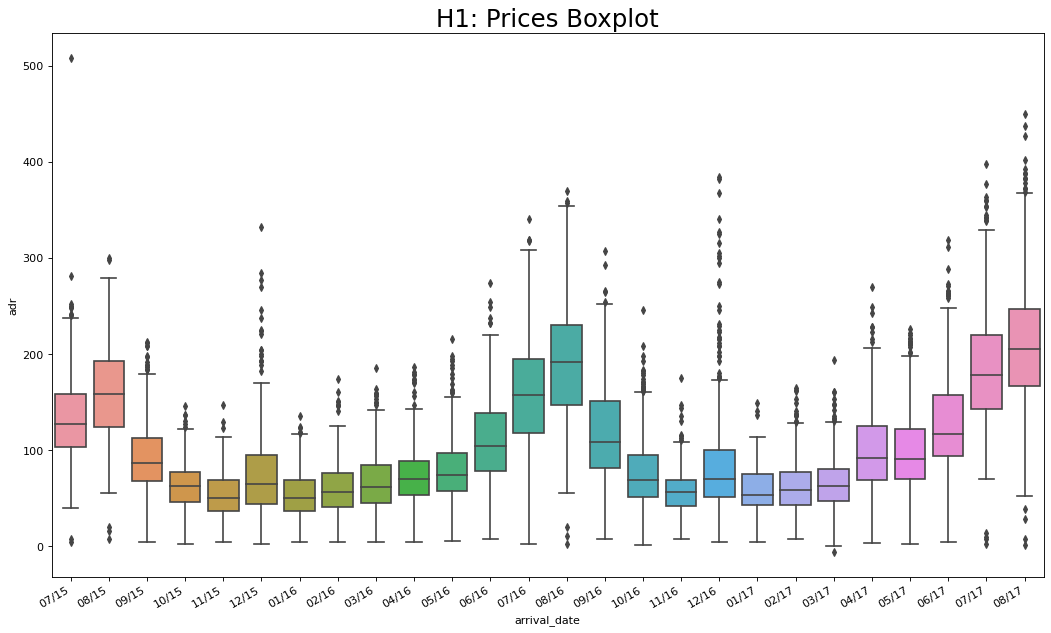

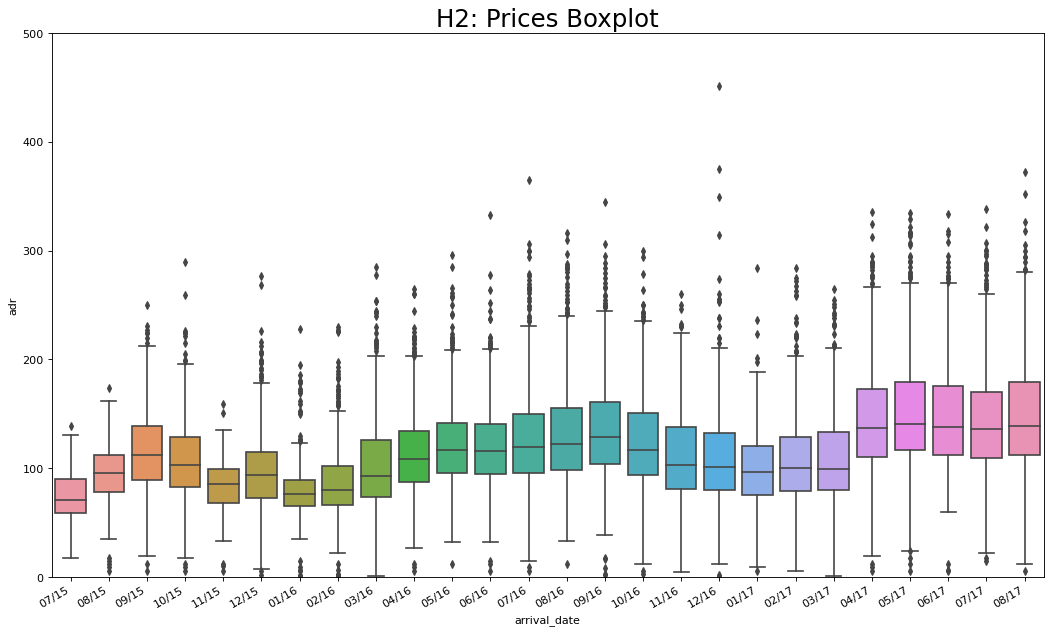

In [29]:
# Draw Boxplots
fig, ax = plt.subplots(figsize=(16,10), dpi= 80) 
sns.boxplot(x=H1_bookings_df_subset.arrival_date, y=H1_bookings_df_subset.adr)
fig.autofmt_xdate()
plt.title('H1: Prices Boxplot', fontsize=22)
plt.show()

fig, ax = plt.subplots(figsize=(16,10), dpi= 80) 
sns.boxplot(x=H2_bookings_df_subset.arrival_date, y=H2_bookings_df_subset.adr)
fig.autofmt_xdate()
ax.set_ylim([0,500])
plt.title('H2: Prices Boxplot', fontsize=22)
plt.show()

As can be seen on the boxplots, the room prices are grouped by in a monthly basis. The boxes allow to clearly see the distribution of prices per months indicating the median, 25th, and 75th percentiles values. In addition, it seems like the prices for both hotels are seasonal with an increase in prices each year.


## 2 - Hotel Prices Prediction for Fall 2017

I am now interested in predicting the prices for the remaining months of 2017. To do so, I am going to use a seasonal Holt-Winters model. I intend to predict the mean, 25th, 75th percentiles price values for September, October, November, and December of 2017.

But first, I am going to check more scientifically on the seasonality of the pricing data for H1 and H2. And, use the Holt-Winters model to predict the prices' range for August 2017 for which I already have the true prices to get a sense of how good the model can perform.


C:\Users\JeffO\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\JeffO\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


Text(0.5, 1.0, "Holt-Winter's Seasonal Smoothing")

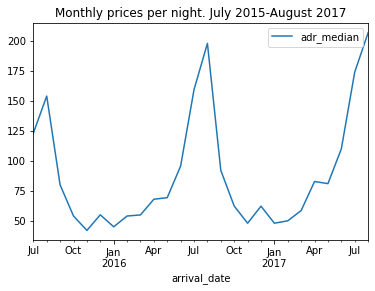

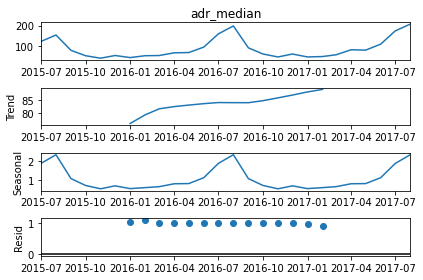

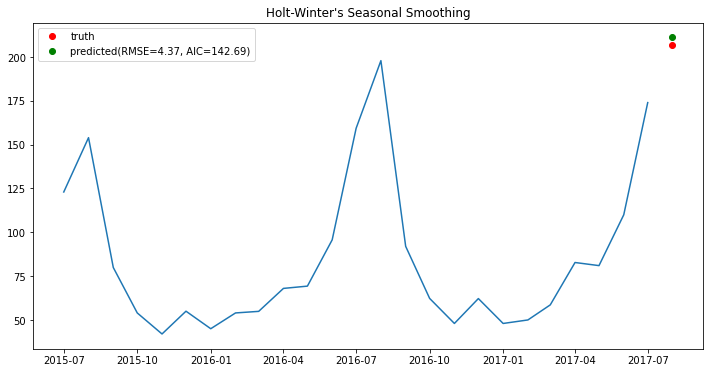

In [33]:
# load DateFormatter from Matplotlib
from matplotlib.dates import DateFormatter

# load Numpy library and name it 'np'
import numpy as np

# load packages to check for seasonalty and apply Holt-Winters
from statsmodels.tsa.seasonal import seasonal_decompose 
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# read data from the 'hotel_bookings.csv' file
hotel_bookings_df = pd.read_csv('hotel_bookings.csv')

# create two dataframes for the resort and city hotels
# H1 = Resort Hotel or H2 = City Hotel
hotel_group = hotel_bookings_df.groupby(['hotel'])
hotel_bookings_dfs = [hotel_group.get_group(h) for h in hotel_group.groups] 
H1_bookings_df = hotel_bookings_dfs[1]
H2_bookings_df = hotel_bookings_dfs[0].reset_index(drop = True)

# subsets of H1 and H2 dataframes
H1_bookings_df_subset = H1_bookings_df.loc[H1_bookings_df['adr']!=0, ['arrival_date_year', 'arrival_date_month', 'stays_in_weekend_nights', 'stays_in_week_nights','adr']]
H2_bookings_df_subset = H2_bookings_df.loc[H2_bookings_df['adr']!=0, ['arrival_date_year', 'arrival_date_month', 'stays_in_weekend_nights', 'stays_in_week_nights','adr']]

# reframe H1 and H2 dataframes 
H1_bookings_df_subset['arrival_date'] = H1_bookings_df_subset['arrival_date_month'] + H1_bookings_df_subset['arrival_date_year'].map(str)
H2_bookings_df_subset['arrival_date'] = H2_bookings_df_subset['arrival_date_month'] + H2_bookings_df_subset['arrival_date_year'].map(str)
H1_bookings_df_subset['arrival_date'] = pd.to_datetime(H1_bookings_df_subset.arrival_date)
H2_bookings_df_subset['arrival_date'] = pd.to_datetime(H2_bookings_df_subset.arrival_date)
H1_bookings_df_subset = H1_bookings_df_subset.drop(columns = ['arrival_date_year', 'arrival_date_month'])
H2_bookings_df_subset = H2_bookings_df_subset.drop(columns = ['arrival_date_year', 'arrival_date_month'])
H1_bookings_df_subset.set_index('arrival_date', inplace=True)
H2_bookings_df_subset.set_index('arrival_date', inplace=True)

# function to calculate mean and sum of specific columns
def f(x):
    d = {}
    d['adr_median'] = x['adr'].median()
    d['adr_.25q'] = x['adr'].quantile(0.25)
    d['adr_.75q'] = x['adr'].quantile(0.75)
    d['stays_in_weekend_nights'] = x['stays_in_weekend_nights'].sum()
    d['stays_in_week_nights'] = x['stays_in_week_nights'].sum()
    return pd.Series(d, index=['adr_median', 'adr_.25q', 'adr_.75q', 'stays_in_weekend_nights', 'stays_in_week_nights'])

# reframe bookings dfs with monthly statistics
H1_bookings_df_subset = H1_bookings_df_subset.groupby(['arrival_date']).apply(f)
H2_bookings_df_subset = H2_bookings_df_subset.groupby(['arrival_date']).apply(f)

# plot the time-series of averaged monthly prices per night
plot_H1_bookings_df_subset = H1_bookings_df_subset['adr_median'].plot()
#H1_bookings_df_subset['adr_.25q'].plot()
#H1_bookings_df_subset['adr_.75q'].plot()
#H2_bookings_df_subset['adr_median'].plot()
#H2_bookings_df_subset['adr_.25q'].plot()
#H2_bookings_df_subset['adr_.75q'].plot()
plt.legend()
plt.title('Monthly prices per night. July 2015-August 2017')
decompose_H1_med_prices = seasonal_decompose(H1_bookings_df_subset['adr_median'],model='multiplicative')
decompose_H1_med_prices_plot = decompose_H1_med_prices.plot()
#decompose_H1_25q_prices = seasonal_decompose(H1_bookings_df_subset['adr_median'],model='multiplicative')
#decompose_H1_25q_prices_plot = decompose_H1_25q_prices.plot()
#decompose_H1_75q_prices = seasonal_decompose(H1_bookings_df_subset['adr_median'],model='multiplicative')
#decompose_H1_75q_prices_plot = decompose_H1_75q_prices.plot()
#decompose_H2_med_prices = seasonal_decompose(H2_bookings_df_subset['adr_median'],model='multiplicative')
#decompose_H2_med_prices_plot = decompose_H2_med_prices.plot()
#decompose_H2_25q_prices = seasonal_decompose(H2_bookings_df_subset['adr_median'],model='multiplicative')
#decompose_H2_25q_prices_plot = decompose_H2_25q_prices.plot()
#decompose_H2_75q_prices = seasonal_decompose(H2_bookings_df_subset['adr_median'],model='multiplicative')
#decompose_H2_75q_prices_plot = decompose_H2_75q_prices.plot()


# get the train and test sets ready 
train_H1 = H1_bookings_df_subset.iloc[:-1, 0]
test_H1 = H1_bookings_df_subset.iloc[-1:, 0]
#train_H1_25q = H1_bookings_df_subset.iloc[:-1, 1]
#test_H1_25q = H1_bookings_df_subset.iloc[-1:, 1]
#train_H1_75q = H1_bookings_df_subset.iloc[:-1, 2]
#test_H1_75q = H1_bookings_df_subset.iloc[-1:, 2]
#train_H2 = H2_bookings_df_subset.iloc[:-1, 0]
#test_H2 = H2_bookings_df_subset.iloc[-1:, 0]
#train_H2_25q = H2_bookings_df_subset.iloc[:-1, 1]
#test_H2_25q = H2_bookings_df_subset.iloc[-1:, 1]
#train_H2_75q = H2_bookings_df_subset.iloc[:-1, 2]
#test_H2_75q = H2_bookings_df_subset.iloc[-1:, 2]

# fit a Holt-Winter’s Seasonal Smoothing model
model = ExponentialSmoothing(train_H1, trend="add", seasonal="add", seasonal_periods=12)
fit = model.fit()
pred = fit.forecast(1)
sse1 = np.sqrt(np.mean(np.square(test_H1.values - pred.values)))
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(train_H1.index, train_H1.values)
ax.plot(test_H1.index, test_H1.values,'ro', label='truth')
ax.plot(test_H1.index, pred,'go',label="predicted(RMSE={:0.2f}, AIC={:0.2f})".format(sse1, fit.aic))
ax.legend()
ax.set_title("Holt-Winter's Seasonal Smoothing")

The three graphs printed all tell us something. In fact, the second graphics indicate that the median prices for H1 are seasonal with an increasing trend. The third graphics shows the predicted median price and the true median price for August 2017 with a RMSE value of 4.37 which is relatively low indicating the good predictive performance of the model.

The code gives the option to uncomment some commands to perform the above analysis for the 25th and 75th percentile prices and for H2. The analysis for H2 is also indicative of the good forecasting capacity of the model.

Now, I am going to use the Holt-Winters model to predict the median, 25th, and 75th percentiles prices of Fall 2017 for H1 and H2. 

In [43]:
# get the traing sets ready
train_H1 = H1_bookings_df_subset.iloc[:, 0]
train_H2 = H2_bookings_df_subset.iloc[:, 0]
train_H1_25q = H1_bookings_df_subset.iloc[:, 1]
train_H2_25q = H2_bookings_df_subset.iloc[:, 1]
train_H1_75q = H1_bookings_df_subset.iloc[:, 2]
train_H2_75q = H2_bookings_df_subset.iloc[:, 2]

# fit a Holt-Winter’s Seasonal Smoothing model
model_H1 = ExponentialSmoothing(train_H1, trend="add", seasonal="add", seasonal_periods=12)
fit_H1 = model_H1.fit()
pred_H1 = fit_H1.forecast(4)
model_H1_25q = ExponentialSmoothing(train_H1_25q, trend="add", seasonal="add", seasonal_periods=12)
fit_H1_25q = model_H1_25q.fit()
pred_H1_25q = fit_H1_25q.forecast(4)
model_H1_75q = ExponentialSmoothing(train_H1_75q, trend="add", seasonal="add", seasonal_periods=12)
fit_H1_75q = model_H1_75q.fit()
pred_H1_75q = fit_H1_75q.forecast(4)

model_H2 = ExponentialSmoothing(train_H2, trend="add", seasonal="add", seasonal_periods=12)
fit_H2 = model_H2.fit()
pred_H2 = fit_H2.forecast(4)
model_H2_25q = ExponentialSmoothing(train_H2_25q, trend="add", seasonal="add", seasonal_periods=12)
fit_H2_25q = model_H2_25q.fit()
pred_H2_25q = fit_H2_25q.forecast(4)
model_H2_75q = ExponentialSmoothing(train_H2_75q, trend="add", seasonal="add", seasonal_periods=12)
fit_H2_75q = model_H2_75q.fit()
pred_H2_75q = fit_H2_75q.forecast(4)

print(pred_H1)
print(pred_H1_25q)
print(pred_H1_75q)



C:\Users\JeffO\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\JeffO\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\JeffO\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\JeffO\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\JeffO\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency informa

2017-09-01    115.763973
2017-10-01     85.977114
2017-11-01     71.159366
2017-12-01     83.388623
Freq: MS, dtype: float64
2017-09-01    83.706771
2017-10-01    58.916771
2017-11-01    47.506771
2017-12-01    53.706771
Freq: MS, dtype: float64
2017-09-01    154.931215
2017-10-01    109.750007
2017-11-01     95.462805
2017-12-01    114.300302
Freq: MS, dtype: float64


Above are the predicted median, Q1, and Q2 H1 prices for the last 4 months of 2017. For instance, in September 2017, the median price is expected to be around 116 dollars per night, and the Q1 and Q3 prices are expected to be 84 dollars and 156 dollars.

Similarly, I could print the predicted prices for H2 and apply the same analysis.


## Conclusion

This notebook presents a basic framework to visualize and predict prices for hotel rooms having a seasonal price dynamic. Here the pricing strategy was given a monthly frequency, but it would be interesting to elaborate this work by adding to it an intra-month pricing strategy. In other words, the goal would be to visualize and predict the prices on a daily basis. That intra-month pricing strategy would make sense because there are days within each month that are atypical like the 4th of july and January 31st. 